In [1]:
import pandas as pd
from pandas_profiling import ProfileReport

In [2]:
 df=pd.read_excel('C:\\Users\\dell\\Desktop\\ankit.xlsx')

In [4]:
df.drop(columns='SR.NO',inplace=True)

In [5]:
df

,Year,GDP,PD,POWER CONSU.,waste
0,1960,428.058980,2532.000000,330.371000,0.557196
1,1961,449.151071,2540.895522,374.399091,0.571303
2,1962,472.085824,2612.238806,422.906233,0.585091
3,1963,511.205575,2679.104478,476.856033,0.598859
4,1964,485.533858,2748.656716,536.773646,0.612680
...,...,...,...,...,...
56,2016,56848.175392,7908.720733,8414.057218,1.393580
57,2017,61176.456361,7915.730606,8267.624428,1.372764
58,2018,66679.046490,7952.998590,8457.659209,1.364682
59,2019,65640.707948,8044.526093,8522.570772,1.268329


In [70]:
df.describe()

,GDP,PD,POWER CONSU.,waste
count,61.000000,61.000000,61.000000,61.000000
mean,20341.025544,4959.689404,4826.985434,0.984160
std,21001.808674,1791.992469,3131.149114,0.253040
min,428.058980,2532.000000,330.371000,0.557196
25%,2489.911575,3377.014925,1728.100415,0.775367
50%,11861.756159,4547.958209,4983.046353,0.988820
75%,29961.263277,6191.236575,8267.624428,1.176390
max,66679.046490,8044.526093,8844.687593,1.454207


In [6]:
import prophet

In [7]:
import fbprophet
from fbprophet import Prophet

In [8]:
import pandas as pd
import pandas_profiling
import numpy as np 
import math as math
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#from plotly.subplots import make_subplot
%matplotlib inline 

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
df['Year'] = pd.to_datetime(df['Year'],format = '%Y')

In [12]:
df['Year'].describe()

count                      61
unique                     61
top       1999-01-01 00:00:00
freq                        1
first     1960-01-01 00:00:00
last      2020-01-01 00:00:00
Name: Year, dtype: object

In [24]:
#Store the data in the form of dependent and independent variables separately
x = df.iloc[:, 1:4].values 
y = df.iloc[:,4].values 

In [26]:
x

array([[  428.05898003,  2532.        ,   330.37099982],
       [  449.15107128,  2540.89552239,   374.39909103],
       [  472.08582445,  2612.23880597,   422.90623309],
       [  511.20557525,  2679.10447761,   476.85603338],
       [  485.53385821,  2748.65671642,   536.7736462 ],
       [  516.53530334,  2816.26865672,   603.83814868],
       [  566.80767755,  2887.1641791 ,   678.57227773],
       [  626.03352769,  2951.64179104,   758.51498631],
       [  708.60606646,  3002.98507463,   845.99298354],
       [  812.68279685,  3048.50746269,   941.13129237],
       [  925.80391294,  3096.27910448,  1044.26330703],
       [ 1071.41154036,  3153.58208955,  1154.81092338],
       [ 1264.37510721,  3212.53731343,  1371.02769002],
       [ 1685.45979632,  3273.13432836,  1599.17920657],
       [ 2341.70551424,  3328.05970149,  1634.22728496],
       [ 2489.91157518,  3377.01492537,  1728.10041545],
       [ 2758.94038028,  3422.8358209 ,  1884.62041599],
       [ 2846.33598833,  3470.5

In [27]:
y

array([0.55719596, 0.57130256, 0.58509116, 0.59885939, 0.61267969,
       0.62676143, 0.64106165, 0.65541101, 0.67014072, 0.68530566,
       0.70080034, 0.716795  , 0.73221267, 0.74711207, 0.7615324 ,
       0.77536695, 0.78872235, 0.80118904, 0.81187812, 0.82558638,
       0.83594646, 0.8543044 , 0.87328914, 0.89228058, 0.90897118,
       0.92522769, 0.93908891, 0.95289857, 0.96830696, 0.97957882,
       0.98882007, 0.99757135, 1.00244859, 1.01820723, 1.03451444,
       1.05165127, 1.07157557, 1.09232383, 1.12039213, 1.16395594,
       1.15559349, 1.21797617, 1.15183371, 1.14906438, 1.14952874,
       1.17639006, 1.18610931, 1.22059042, 1.23366635, 1.22586677,
       1.28369983, 1.33077068, 1.3683927 , 1.45420715, 1.37383532,
       1.38635903, 1.39358046, 1.3727642 , 1.36468206, 1.26832866,
       1.03415399])

# train test 70:30

In [23]:
from sklearn.model_selection import train_test_split

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

In [57]:
y_test

array([0.55719596, 0.62676143, 1.18610931, 0.99757135, 0.74711207,
       1.38635903, 1.03451444, 1.22586677, 0.73221267, 1.15559349,
       1.01820723, 1.26832866, 0.78872235, 0.59885939, 1.45420715,
       0.80118904, 0.67014072, 0.64106165, 1.21797617])

In [58]:
from sklearn.ensemble import RandomForestRegressor 

In [59]:
#Import the Random Forest Regressor 
from sklearn.ensemble import RandomForestRegressor

In [60]:
#Create a Random Forest regressor object from Random Forest Regressor class
RFReg = RandomForestRegressor(n_estimators =8, random_state = 0)

In [61]:
#Fit the random forest regressor with training data represented by X_train and y_train
RFReg.fit(x_train, y_train)

RandomForestRegressor(n_estimators=8, random_state=0)

In [62]:
#Predicted waste from test dataset w.r.t Random Forest Regression
y_predict_rfr = RFReg.predict((x_test))

#Model Evaluation using R-Square for Random Forest Regression
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_rfr)

In [63]:
print('R-Square Error associated with Random Forest Regression is:', r_square)

R-Square Error associated with Random Forest Regression is: 0.9770476588690867


In [64]:
from sklearn.metrics import mean_squared_error

In [65]:
mse=mean_squared_error(y_test, y_predict_rfr)

In [66]:
mse

0.0018100580998245824

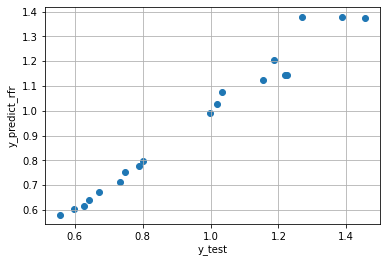

In [69]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict_rfr)
plt.xlabel("y_test")
plt.ylabel("y_predict_rfr")
plt.grid()
plt.show()

In [55]:
# Visualising the Random Forest Regression results
 
# arrange for creating a range of values
# from min value of x to max
# value of x with a difference of 0.01
# between two consecutive values
#X_grid = np.arrange(min(x), max(x), 0.01)
# reshape for reshaping the data into a len(X_grid)*1 array,
# i.e. to make a column out of the X_grid value                 
#X_grid = X_grid.reshape((len(X_grid), 1))
 
# Scatter plot for original data
plt.scatter(x['GDP'], y, color = 'blue') 
 
'''# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid),
         color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('')
plt.ylabel('Salary')
plt.show()'''

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices